<a href="https://colab.research.google.com/github/SonakshiA/EDA-for-Gender-Pay-Gap-Dataset/blob/master/Exploratory_Data_Analysis_Gender_Pay_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opendatasets

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import opendatasets as od
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

**Download the Data**

In [ ]:
od.download('https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:

In [ ]:
df = pd.read_csv('glassdoor-analyze-gender-pay-gap/Glassdoor Gender Pay Gap.csv')

**Data Understanding**

In [ ]:
df.shape

(1000, 9)

In [ ]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
df.columns #List all columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'BasePay', 'Bonus'],
      dtype='object')

In [ ]:
df.dtypes #Data type of columns

,0
JobTitle,object
Gender,object
Age,int64
PerfEval,int64
Education,object
Dept,object
Seniority,int64
BasePay,int64
Bonus,int64


In [ ]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


**Data Preparation**

In [ ]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [ ]:
#Create a new column called TotalSalary
df['TotalSalary'] = df['BasePay'] + df['Bonus']
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalSalary
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [ ]:
df.isna().sum() #Check for null value for each column

,0
JobTitle,0
Gender,0
Age,0
PerfEval,0
Education,0
Dept,0
Seniority,0
BasePay,0
Bonus,0
TotalSalary,0


In [ ]:
df.duplicated() #Check if any rows are duplicated

,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


**Feature Understanding**

In [ ]:
df['JobTitle'].value_counts()

,count
JobTitle,
Marketing Associate,118
Software Engineer,109
Financial Analyst,107
Data Scientist,107
Graphic Designer,98
IT,96
Sales Associate,94
Driver,91
Warehouse Associate,90


Text(0, 0.5, 'Count')

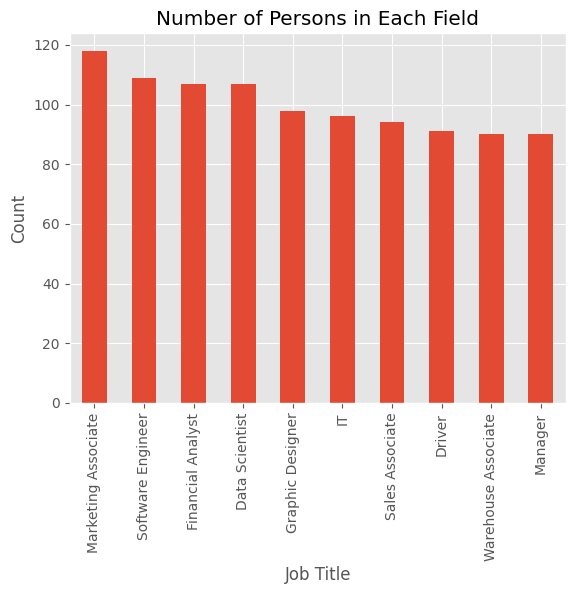

In [ ]:
ax = df['JobTitle'].value_counts().plot(kind='bar',title='Number of Persons in Each Field')
ax.set_xlabel('Job Title')
ax.set_ylabel('Count')

Text(0.5, 1.0, 'Overall Distribution of Education')

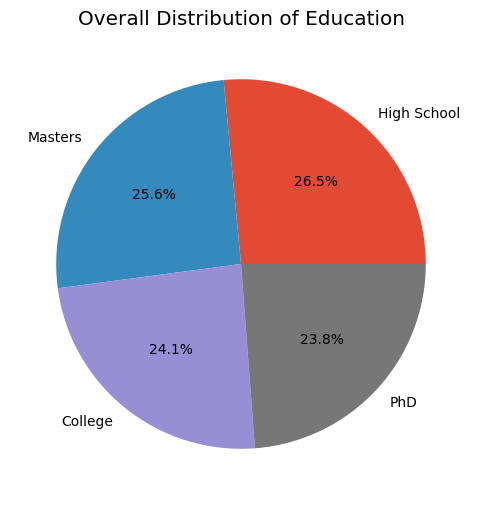

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(df.Education.value_counts(), labels=df.Education.value_counts().index,
        autopct='%1.1f%%')
plt.title('Overall Distribution of Education')

Text(0.5, 1.0, 'Overall Distribution of Gender')

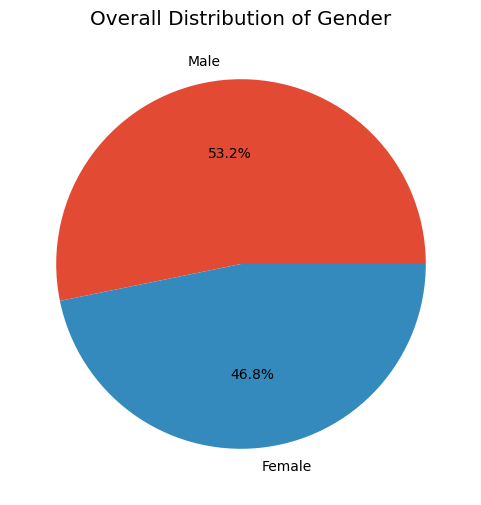

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(df.Gender.value_counts(), labels=df.Gender.value_counts().index,
        autopct='%1.1f%%')
plt.title('Overall Distribution of Gender')

Text(0, 0.5, 'Count')

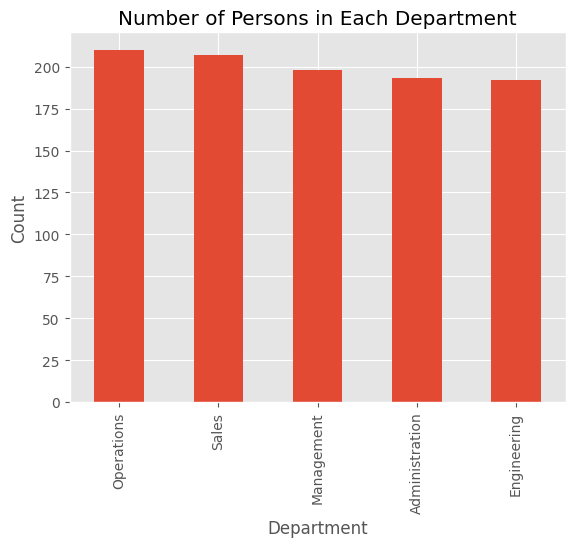

In [ ]:
ax = df['Dept'].value_counts().plot(kind='bar',title='Number of Persons in Each Department')
ax.set_xlabel('Department')
ax.set_ylabel('Count')

**Feature Relationships**

<Axes: xlabel='Age', ylabel='TotalSalary'>

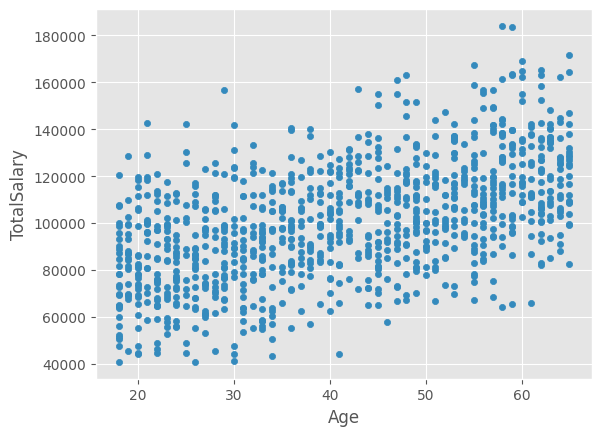

In [ ]:
df.plot(kind='scatter',x='Age',y='TotalSalary')

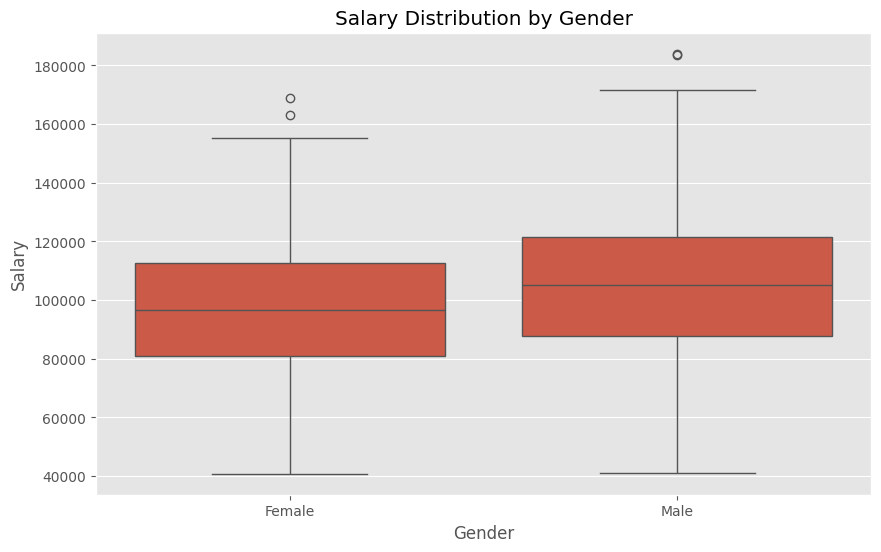

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender',y='TotalSalary',data=df)
plt.title('Salary Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()

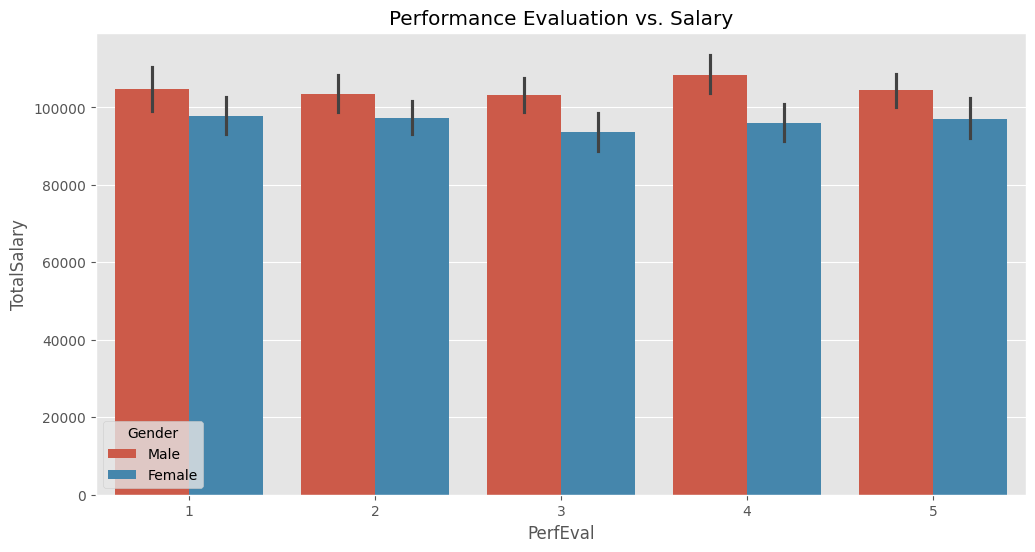

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Performance Evaluation vs. Salary')
sns.barplot(x = "PerfEval", y = 'TotalSalary',
            data = df, hue = 'Gender');

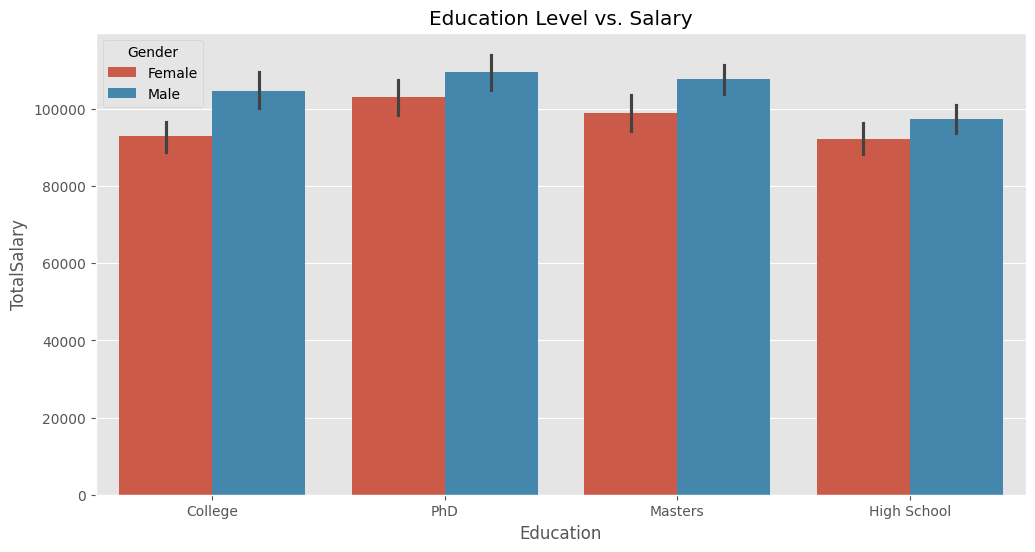

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Education Level vs. Salary')
sns.barplot(x = "Education", y = 'TotalSalary',
            data = df, hue = 'Gender');

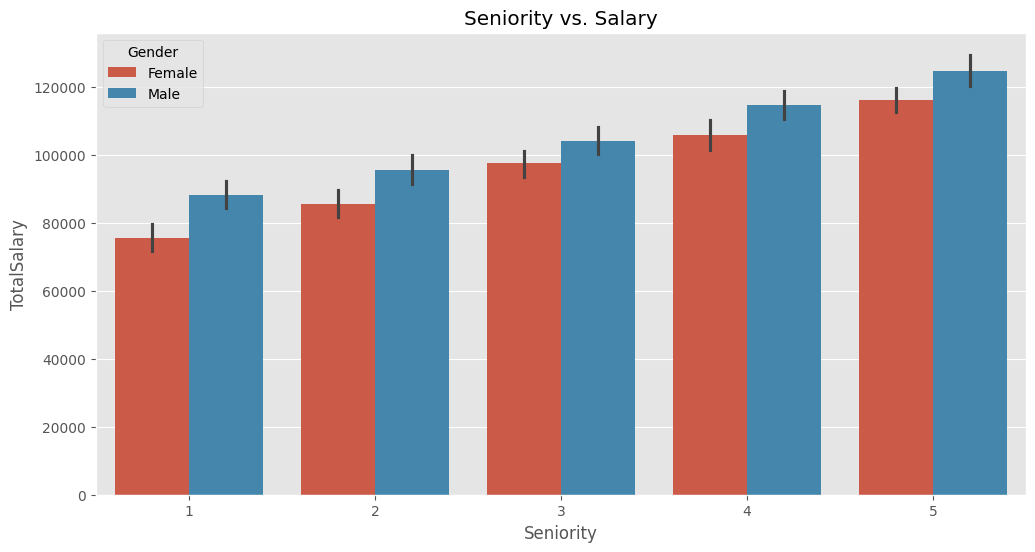

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Seniority vs. Salary')
sns.barplot(x = "Seniority", y = 'TotalSalary',
            data = df, hue = 'Gender');

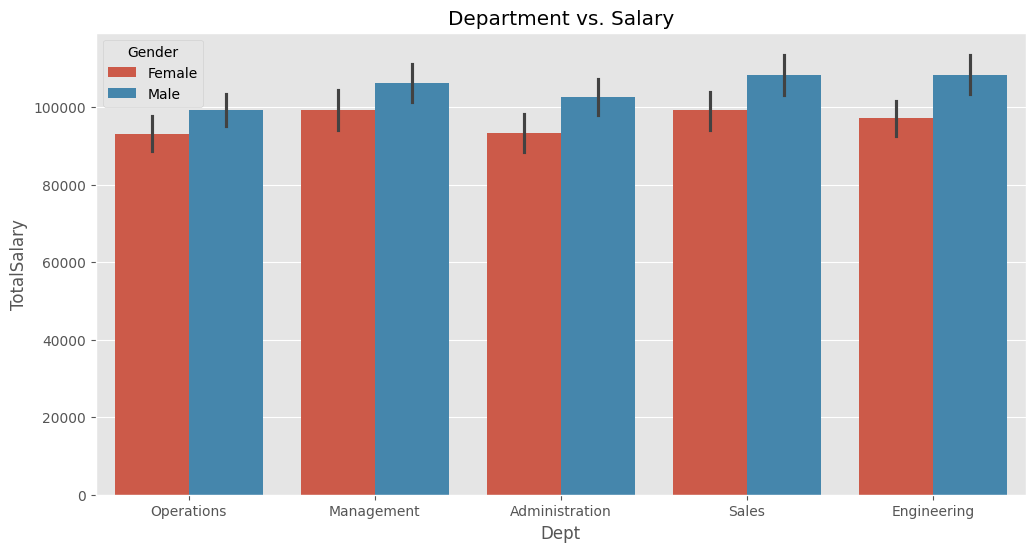

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Department vs. Salary')
sns.barplot(x = "Dept", y = 'TotalSalary',
            data = df, hue = 'Gender');

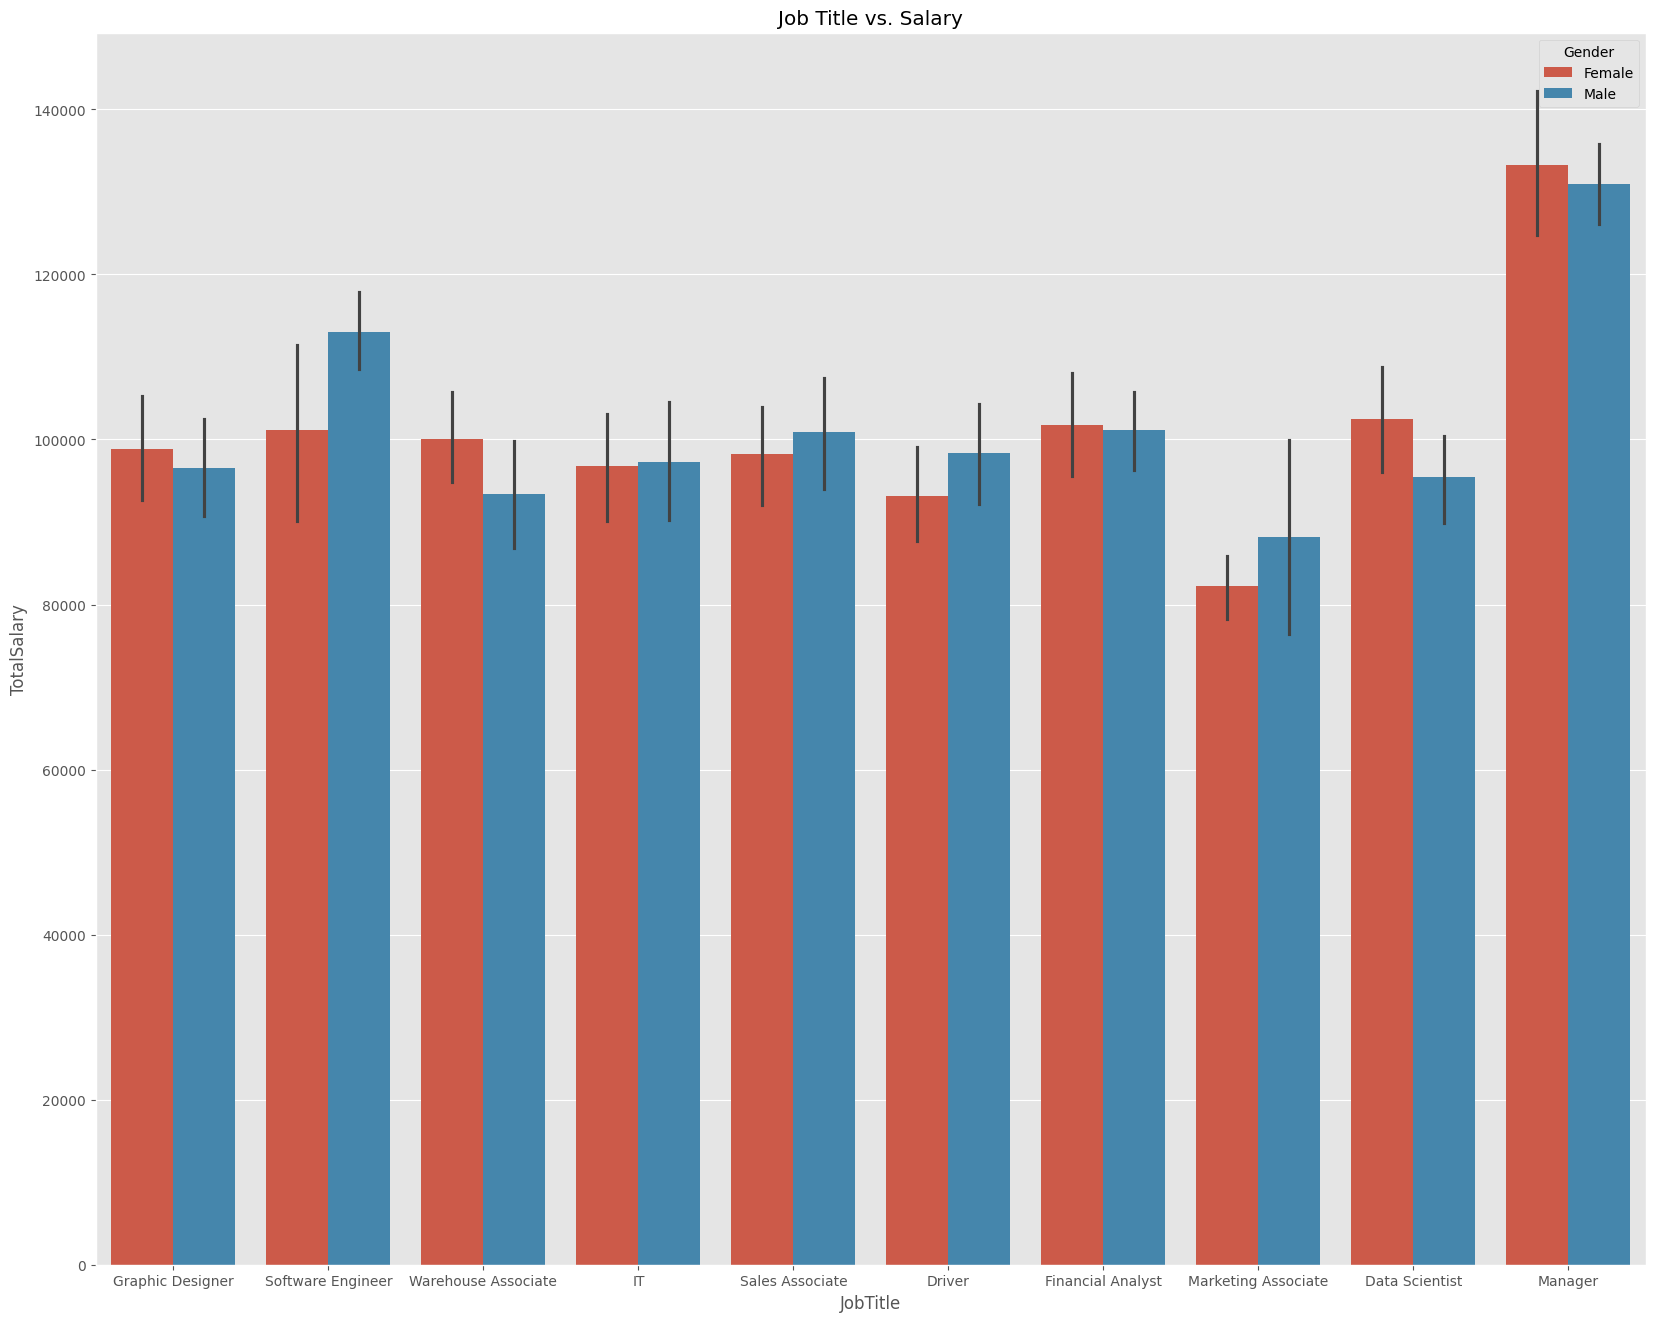

In [ ]:
plt.figure(figsize=(20,16))
plt.title('Job Title vs. Salary')
sns.barplot(x = "JobTitle", y = 'TotalSalary',
            data = df, hue = 'Gender');

**Model Training**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
df = df.drop(['BasePay','Bonus'],axis=1) #Now that we have Total Salary, we can drop BasePay and Bonus

In [ ]:
data_encoded = pd.get_dummies(df, drop_first=False)

In [ ]:
data_encoded.head() #Encode the categorical data

,Age,PerfEval,Seniority,TotalSalary,JobTitle_Data Scientist,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,...,Gender_Male,Education_College,Education_High School,Education_Masters,Education_PhD,Dept_Administration,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales
0,18,5,2,52301,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,21,5,5,119604,False,False,False,False,False,False,...,True,True,False,False,False,False,False,True,False,False
2,19,4,5,99476,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
3,20,5,4,118234,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
4,26,5,5,108783,False,False,False,True,False,False,...,True,False,False,True,False,False,True,False,False,False


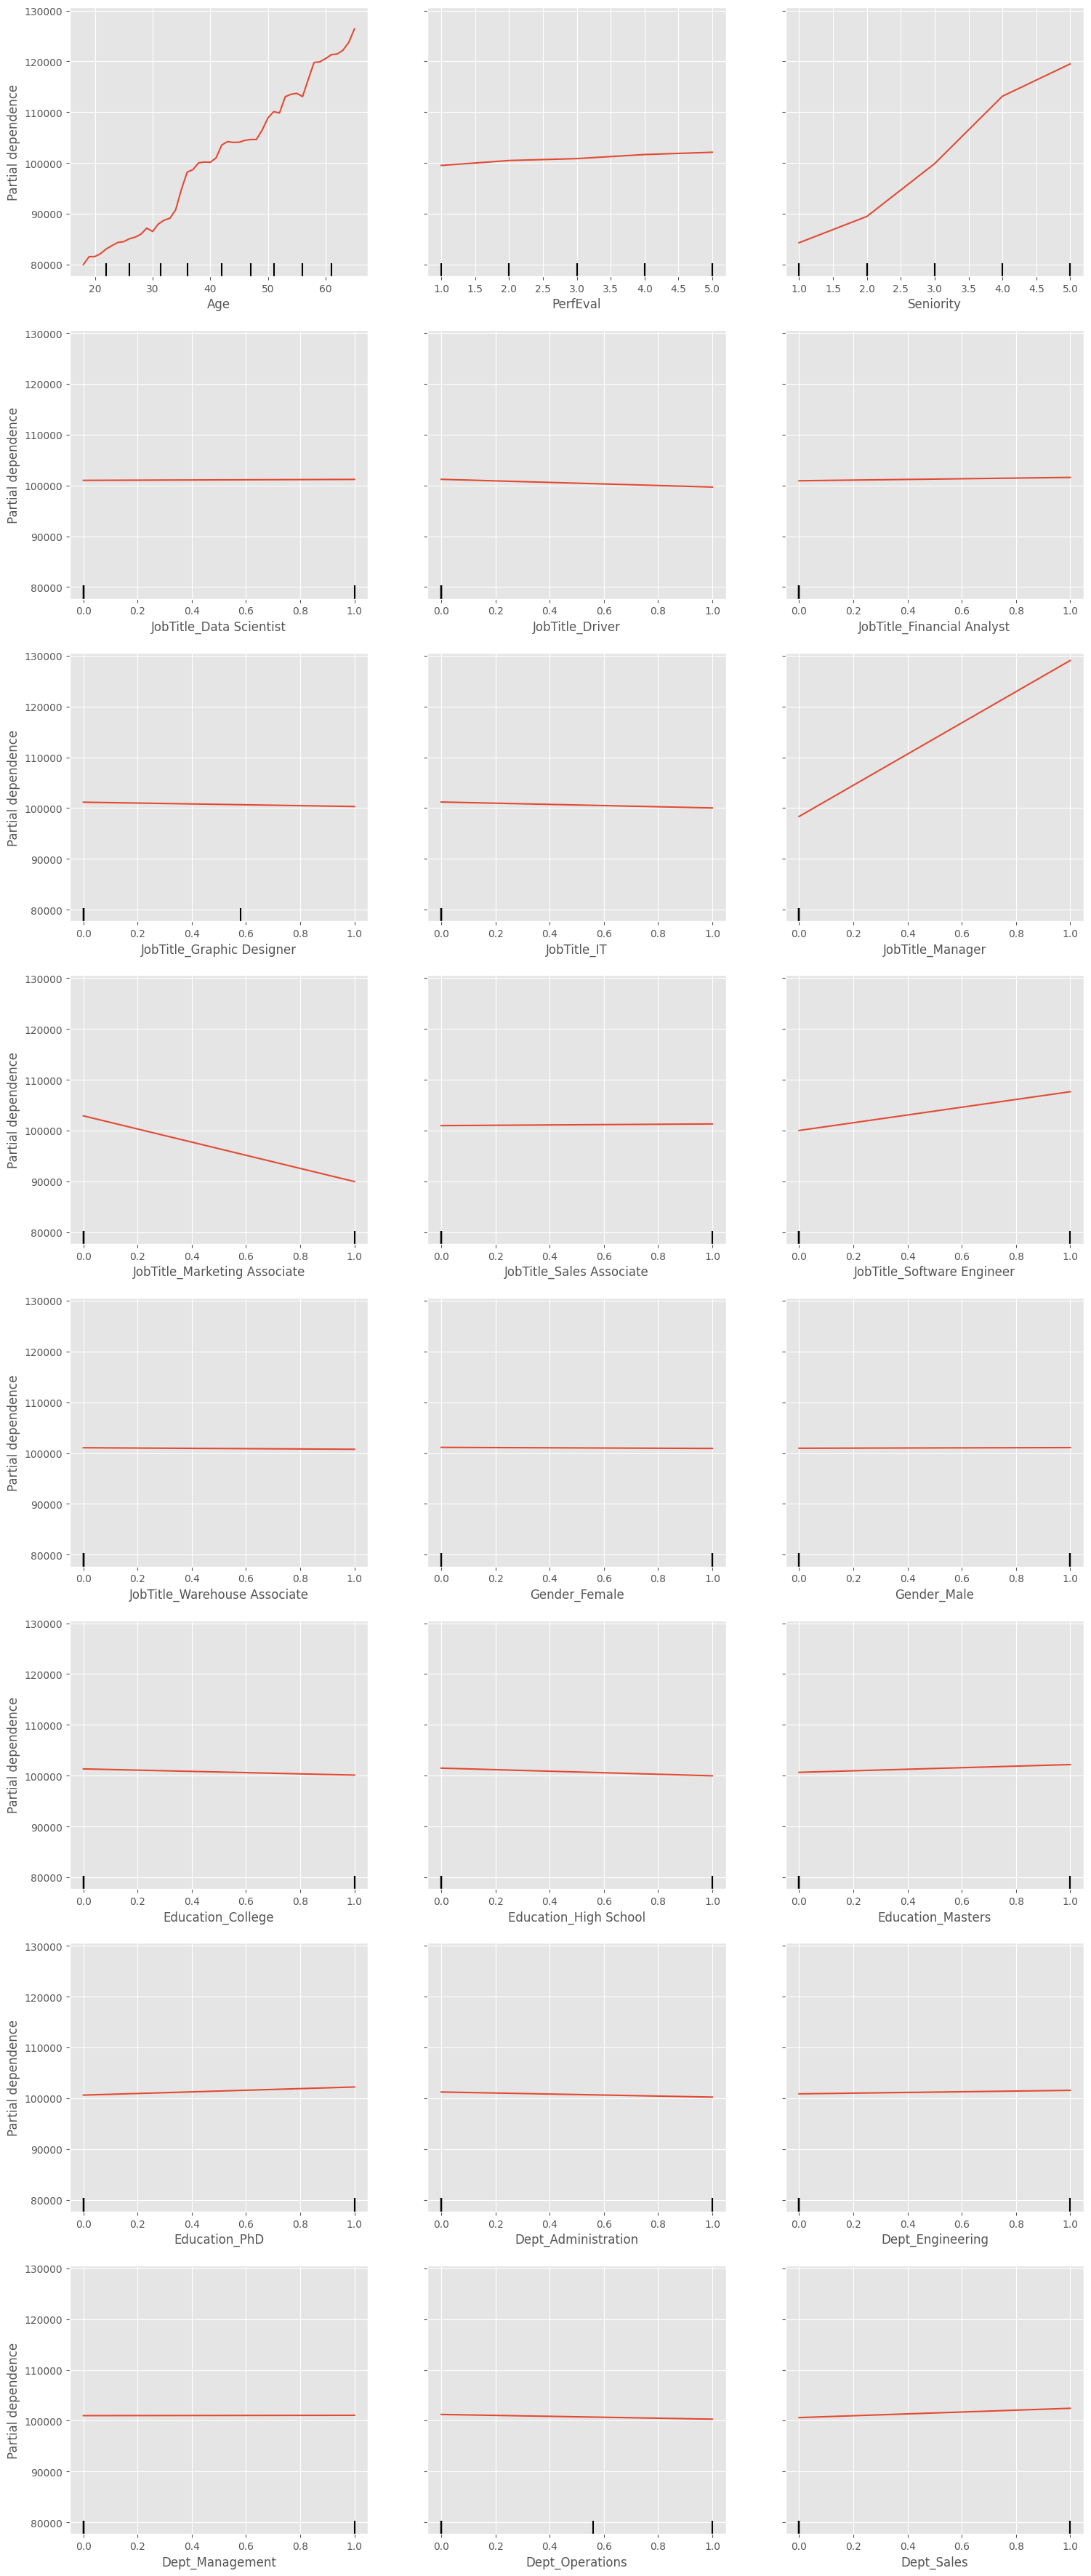

In [ ]:
# Defining features and target variable
X = data_encoded.drop('TotalSalary', axis=1)
y = data_encoded['TotalSalary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Plotting Partial Dependence Plots for all features
features_to_plot = X.columns  # List of all features

# Generate Partial Dependence Plots using PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(18, 25))
PartialDependenceDisplay.from_estimator(model, X_train, features=features_to_plot, grid_resolution=50, ax=ax)


plt.subplots_adjust(top=1.5)  # Adjust top spacing to fit suptitle
plt.show()

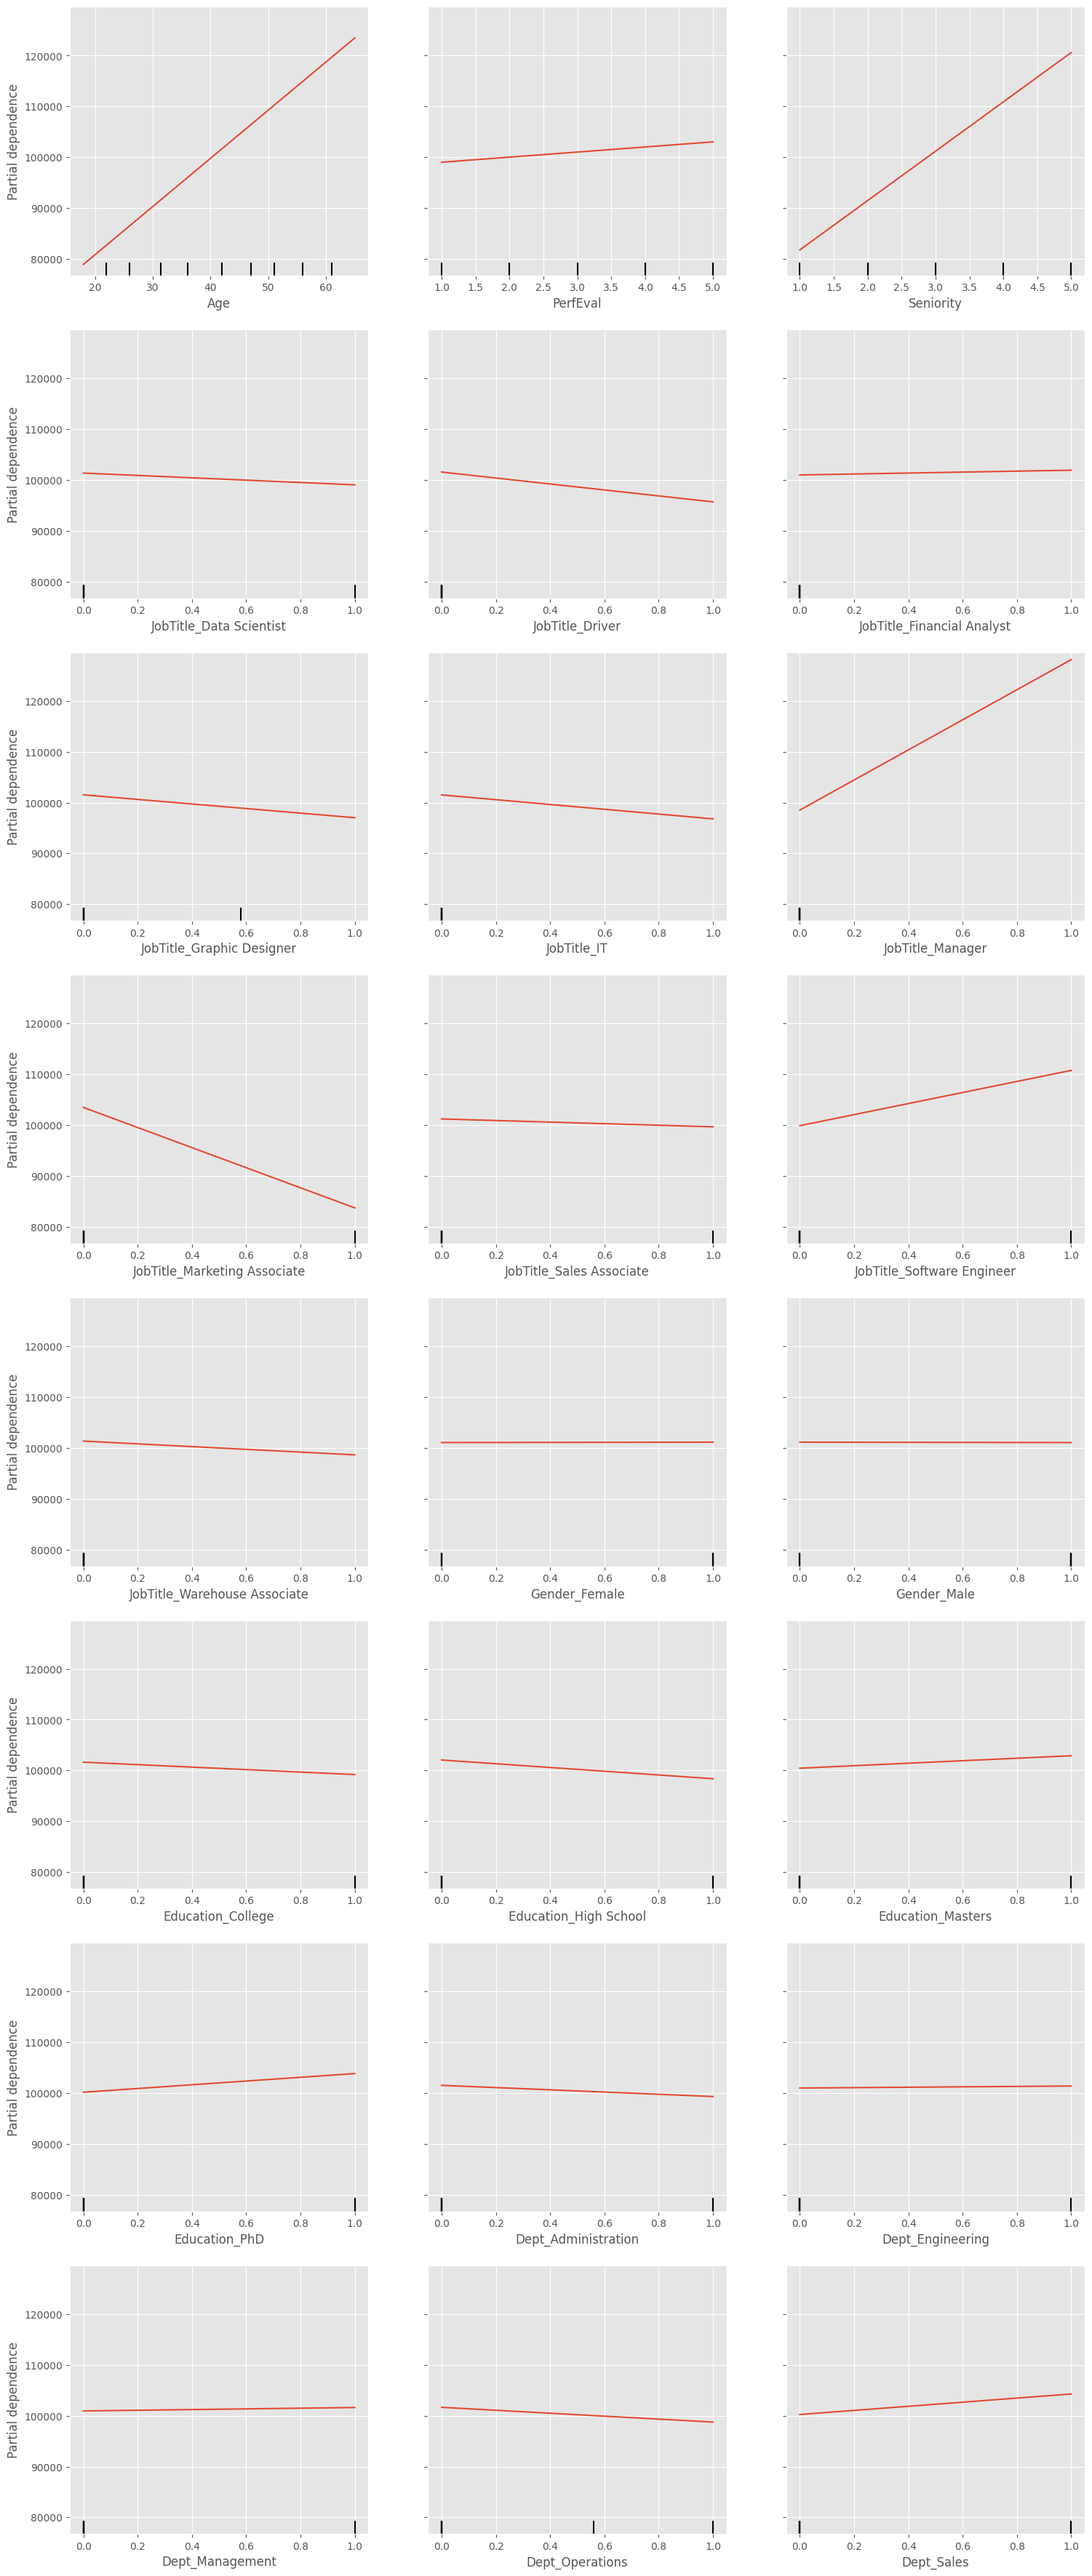

In [ ]:
# Defining features and target variable
X = data_encoded.drop('TotalSalary', axis=1)
y = data_encoded['TotalSalary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Plotting Partial Dependence Plots for all features using the updated function
features_to_plot = X.columns  # List of all features

# Generate Partial Dependence Plots using PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(18, 25))
PartialDependenceDisplay.from_estimator(model, X_train, features=features_to_plot, grid_resolution=50, ax=ax)


plt.subplots_adjust(top=1.5)  # Adjust top spacing to fit suptitle
plt.show()

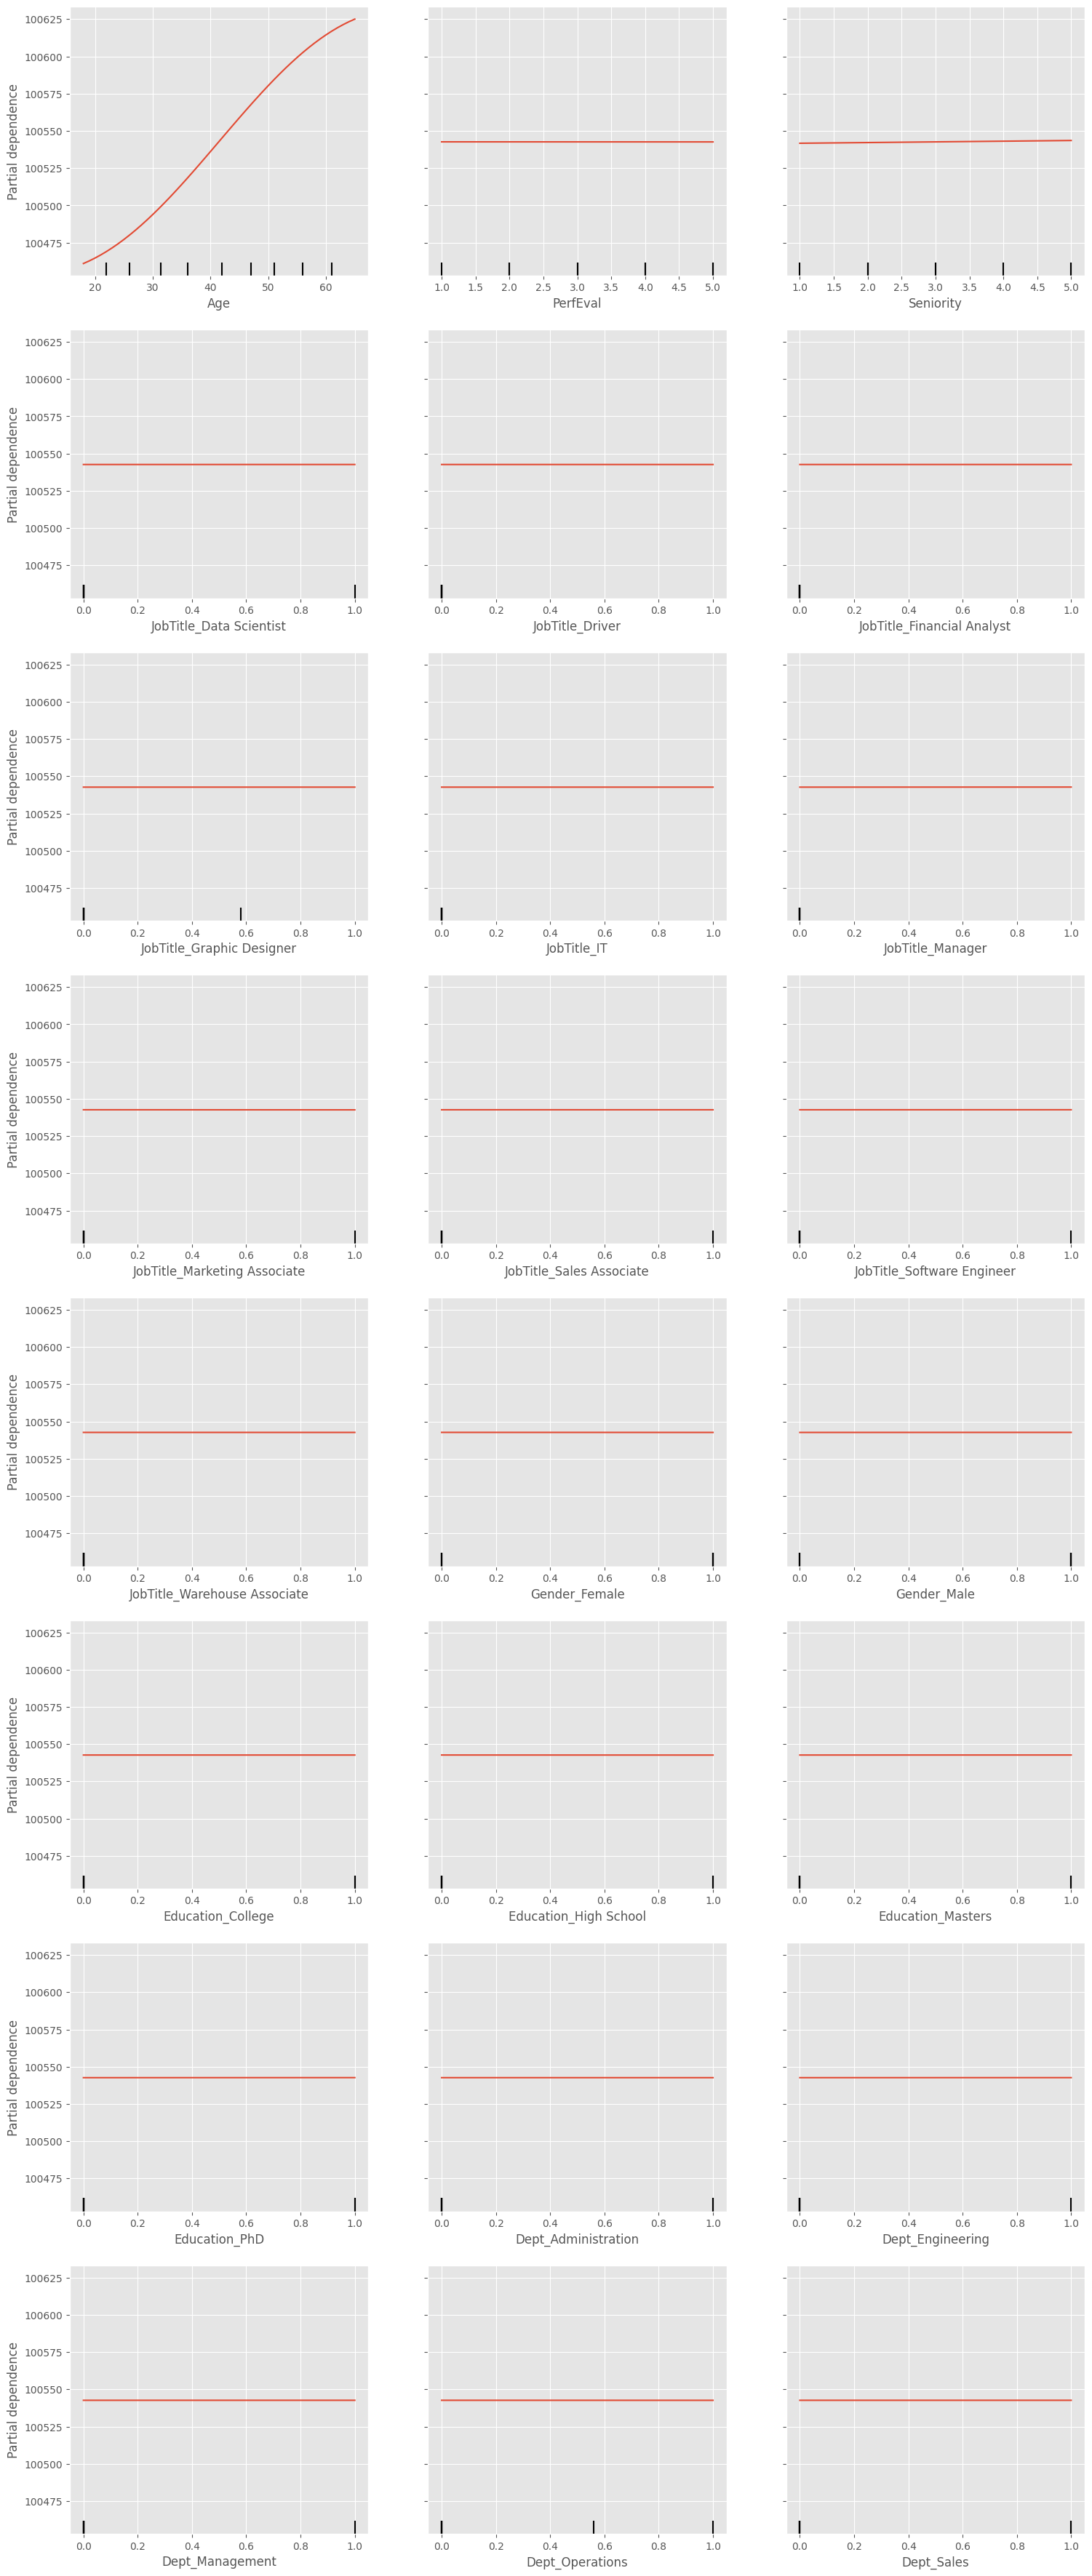

In [ ]:
# Defining features and target variable
X = data_encoded.drop('TotalSalary', axis=1)
y = data_encoded['TotalSalary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Plotting Partial Dependence Plots for all features using the updated function
features_to_plot = X.columns  # List of all features

# Generate Partial Dependence Plots using PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(18, 25))
PartialDependenceDisplay.from_estimator(model, X_train, features=features_to_plot, grid_resolution=50, ax=ax)

plt.subplots_adjust(top=1.5)  # Adjust top spacing to fit suptitle
plt.show()

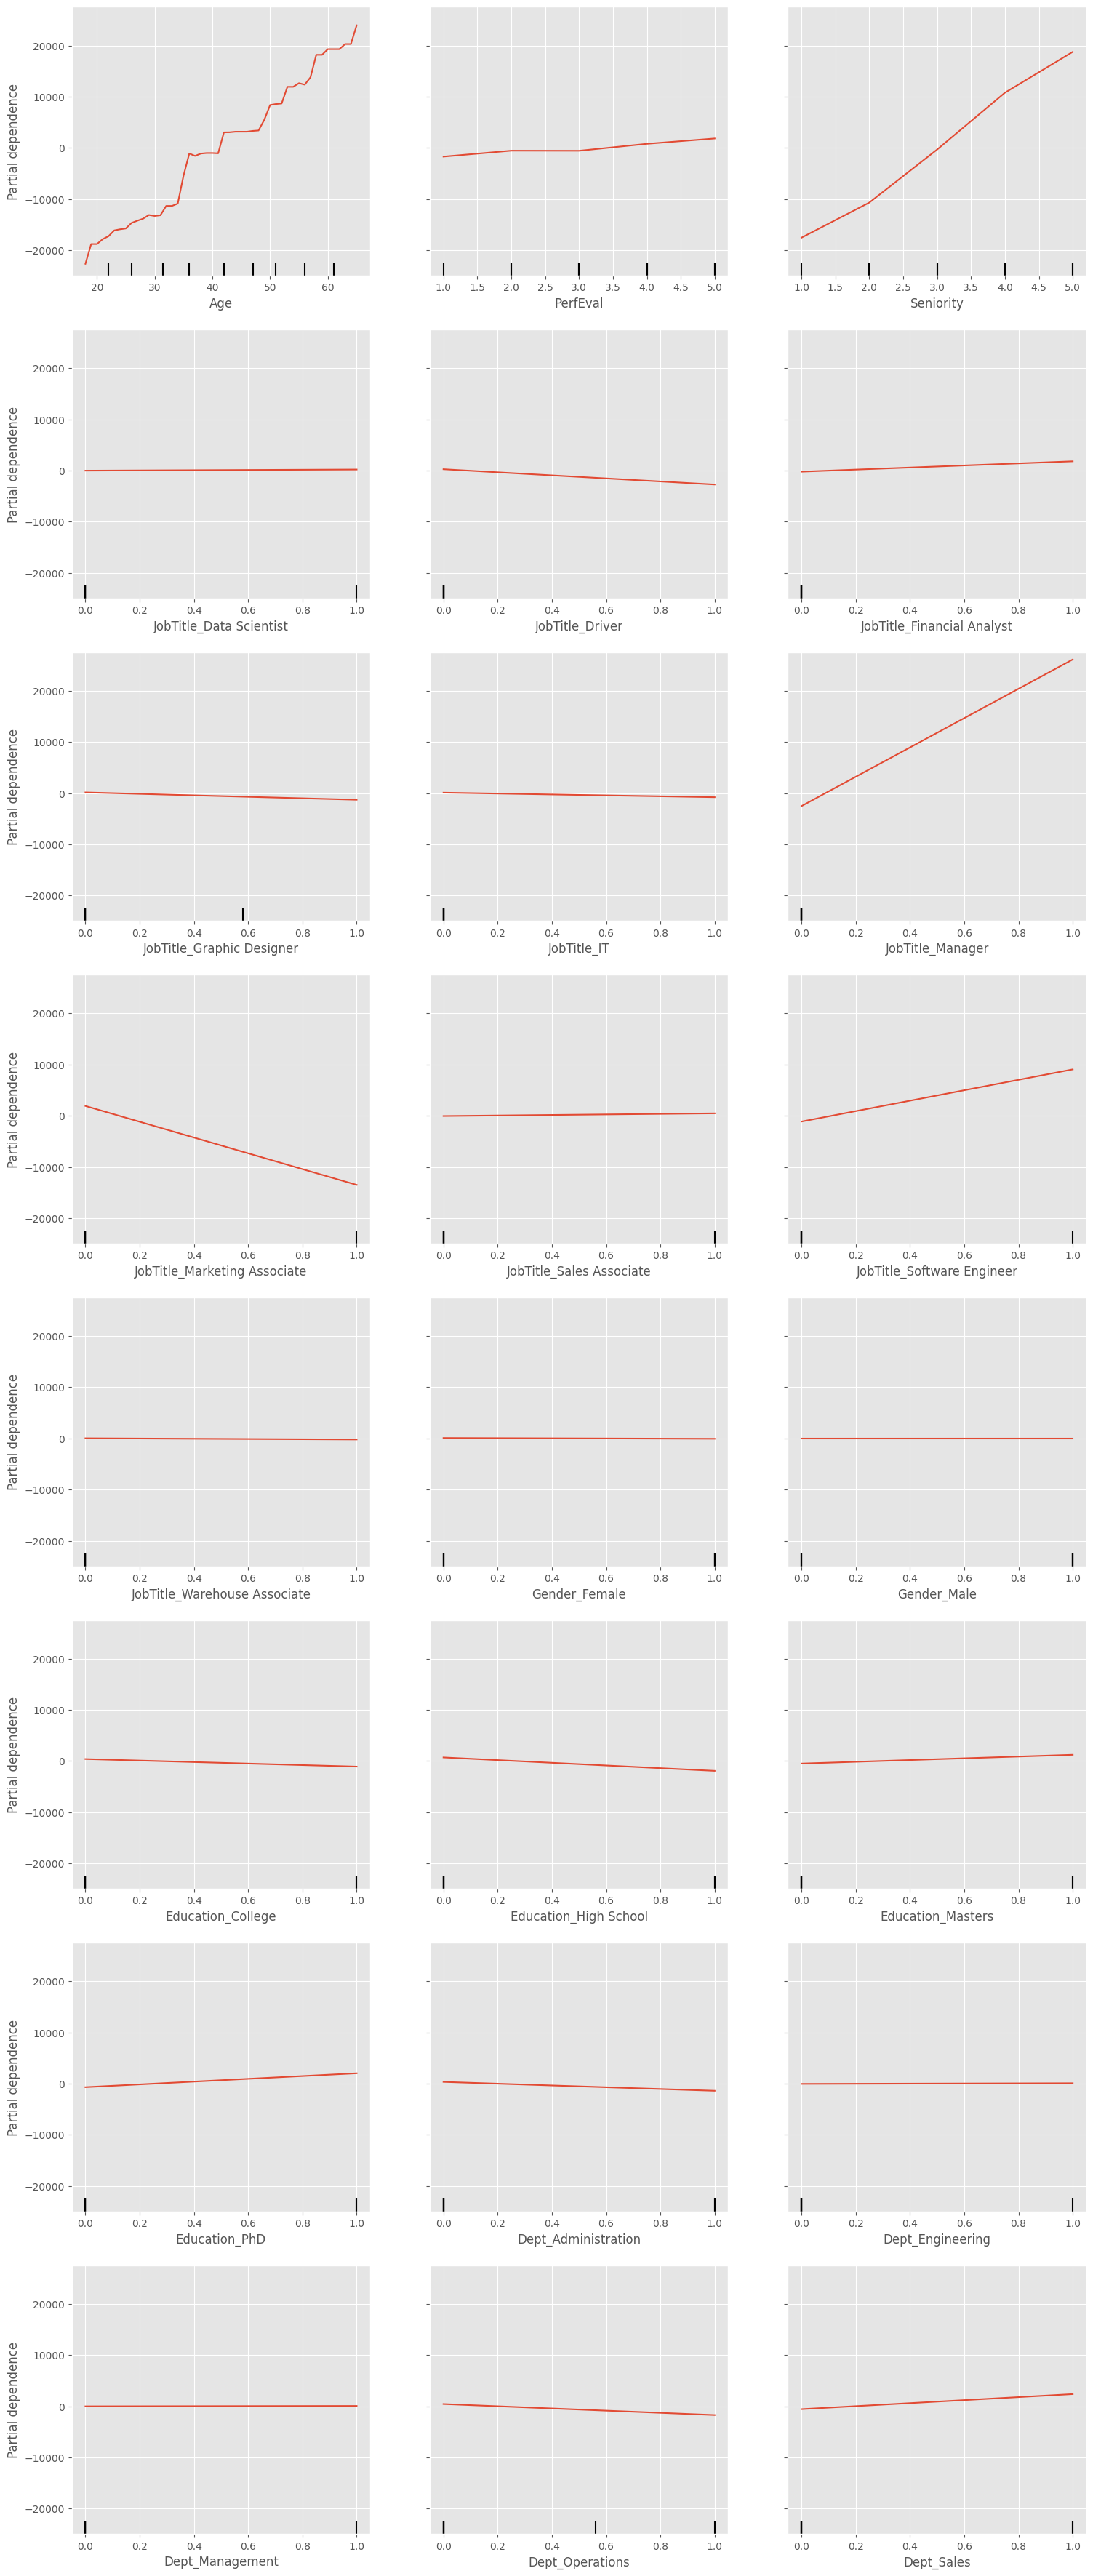

In [ ]:
# Defining features and target variable
X = data_encoded.drop('TotalSalary', axis=1)
y = data_encoded['TotalSalary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Plotting Partial Dependence Plots for all features using the updated function
features_to_plot = X.columns  # List of all features

# Generate Partial Dependence Plots using PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(18, 25))
PartialDependenceDisplay.from_estimator(model, X_train, features=features_to_plot, grid_resolution=50, ax=ax)


plt.subplots_adjust(top=1.5)  # Adjust top spacing to fit suptitle
plt.show()

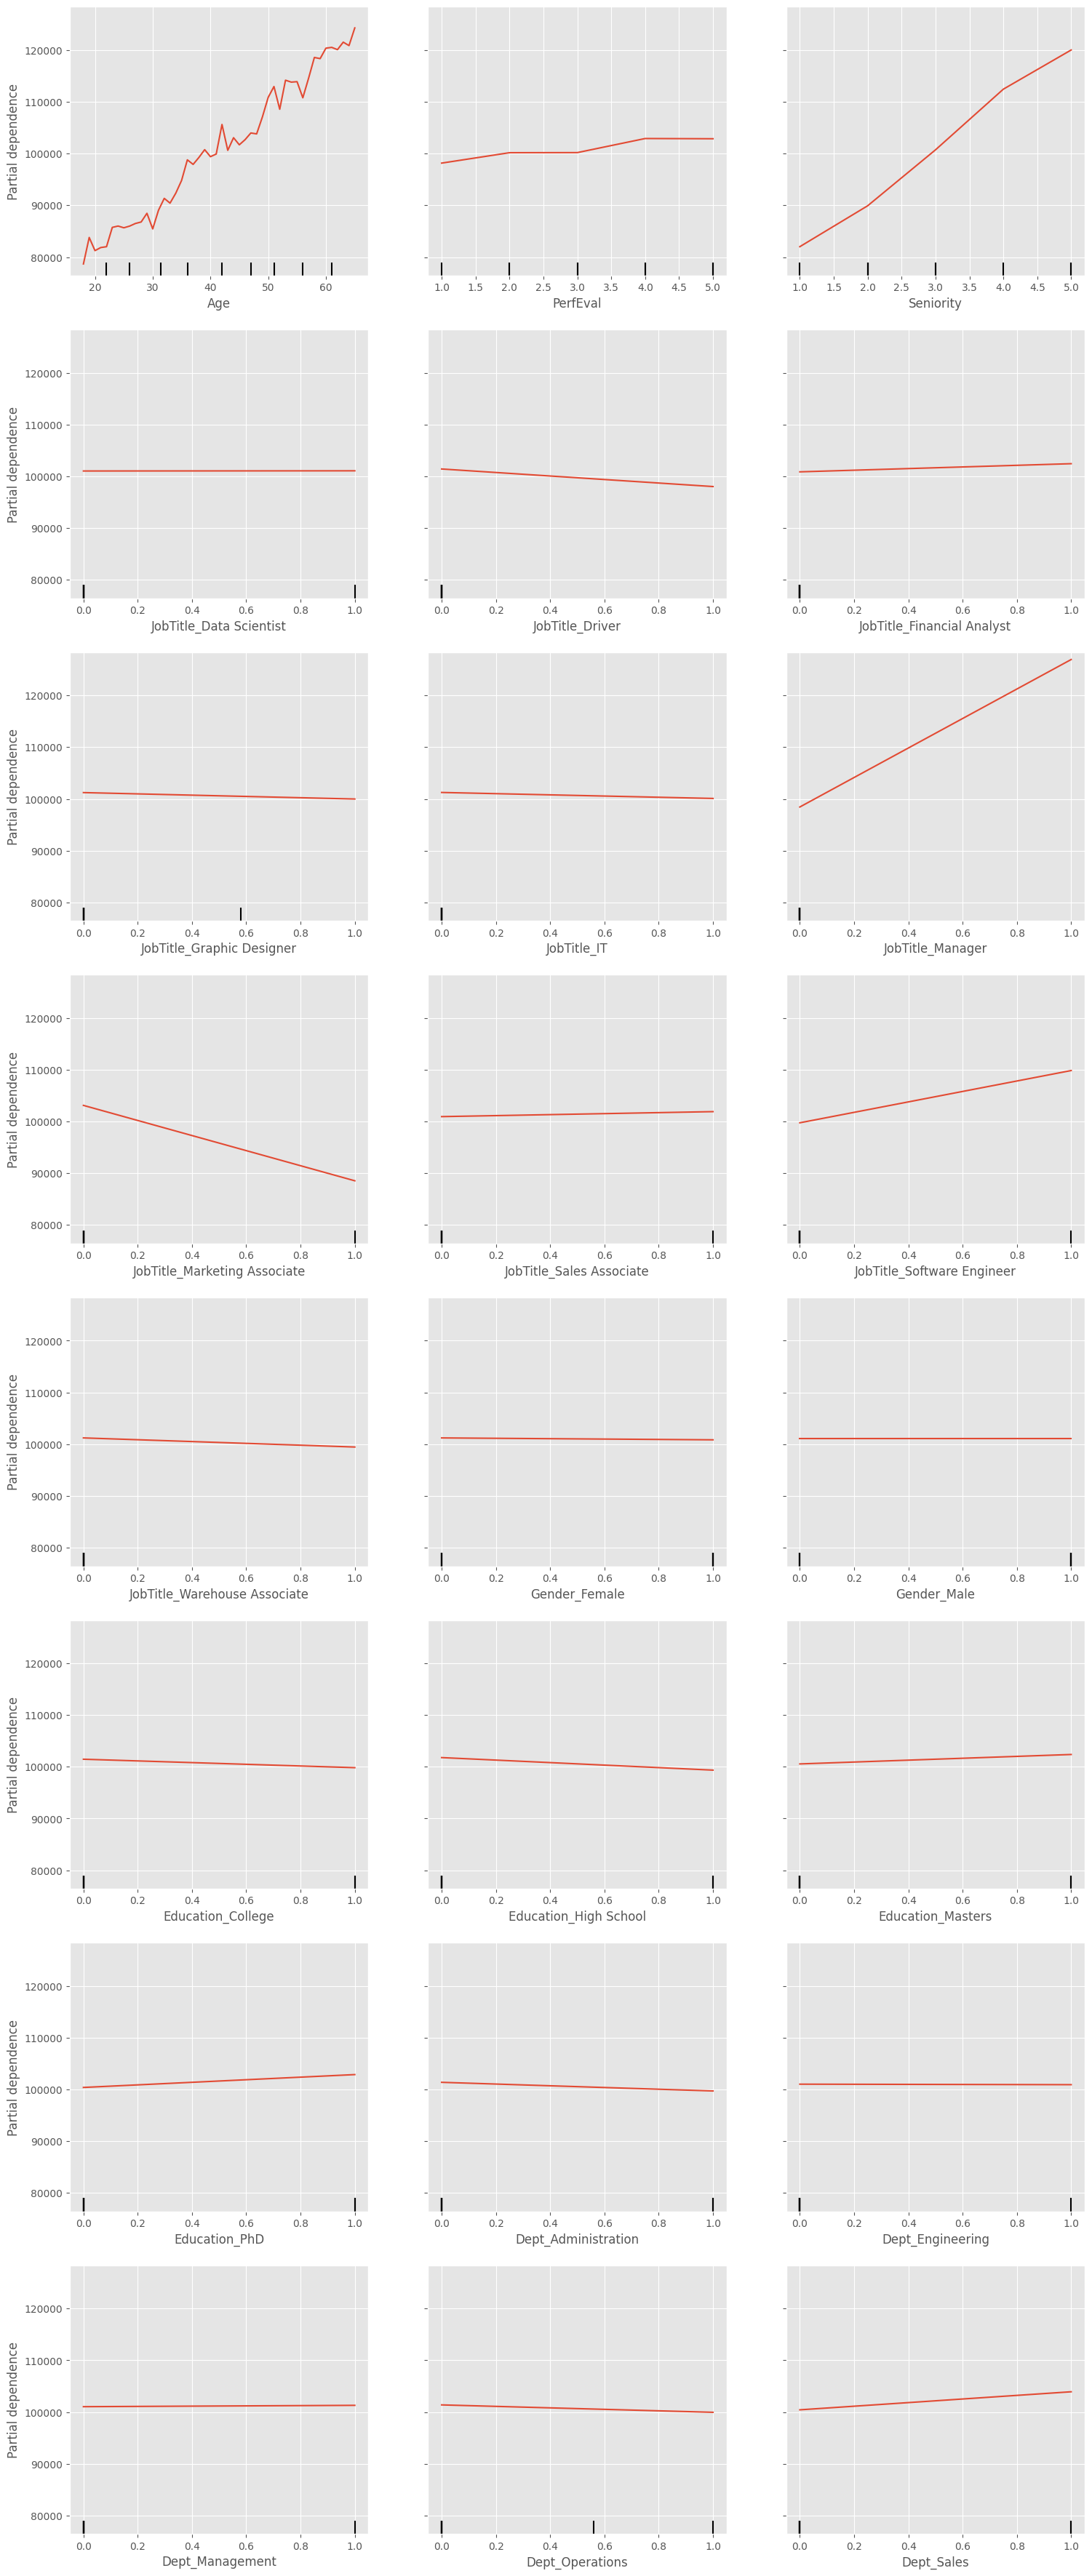

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Defining features and target variable
X = data_encoded.drop('TotalSalary', axis=1)
y = data_encoded['TotalSalary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)
# Plotting Partial Dependence Plots for all features using the updated function
features_to_plot = X.columns  # List of all features

# Generate Partial Dependence Plots using PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(18, 25))
PartialDependenceDisplay.from_estimator(model, X_train, features=features_to_plot, grid_resolution=50, ax=ax)

plt.subplots_adjust(top=1.5)  # Adjust top spacing to fit suptitle
plt.show()

In [ ]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,TotalSalary
0,Graphic Designer,Female,18,5,College,Operations,2,52301
1,Software Engineer,Male,21,5,College,Management,5,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,108783


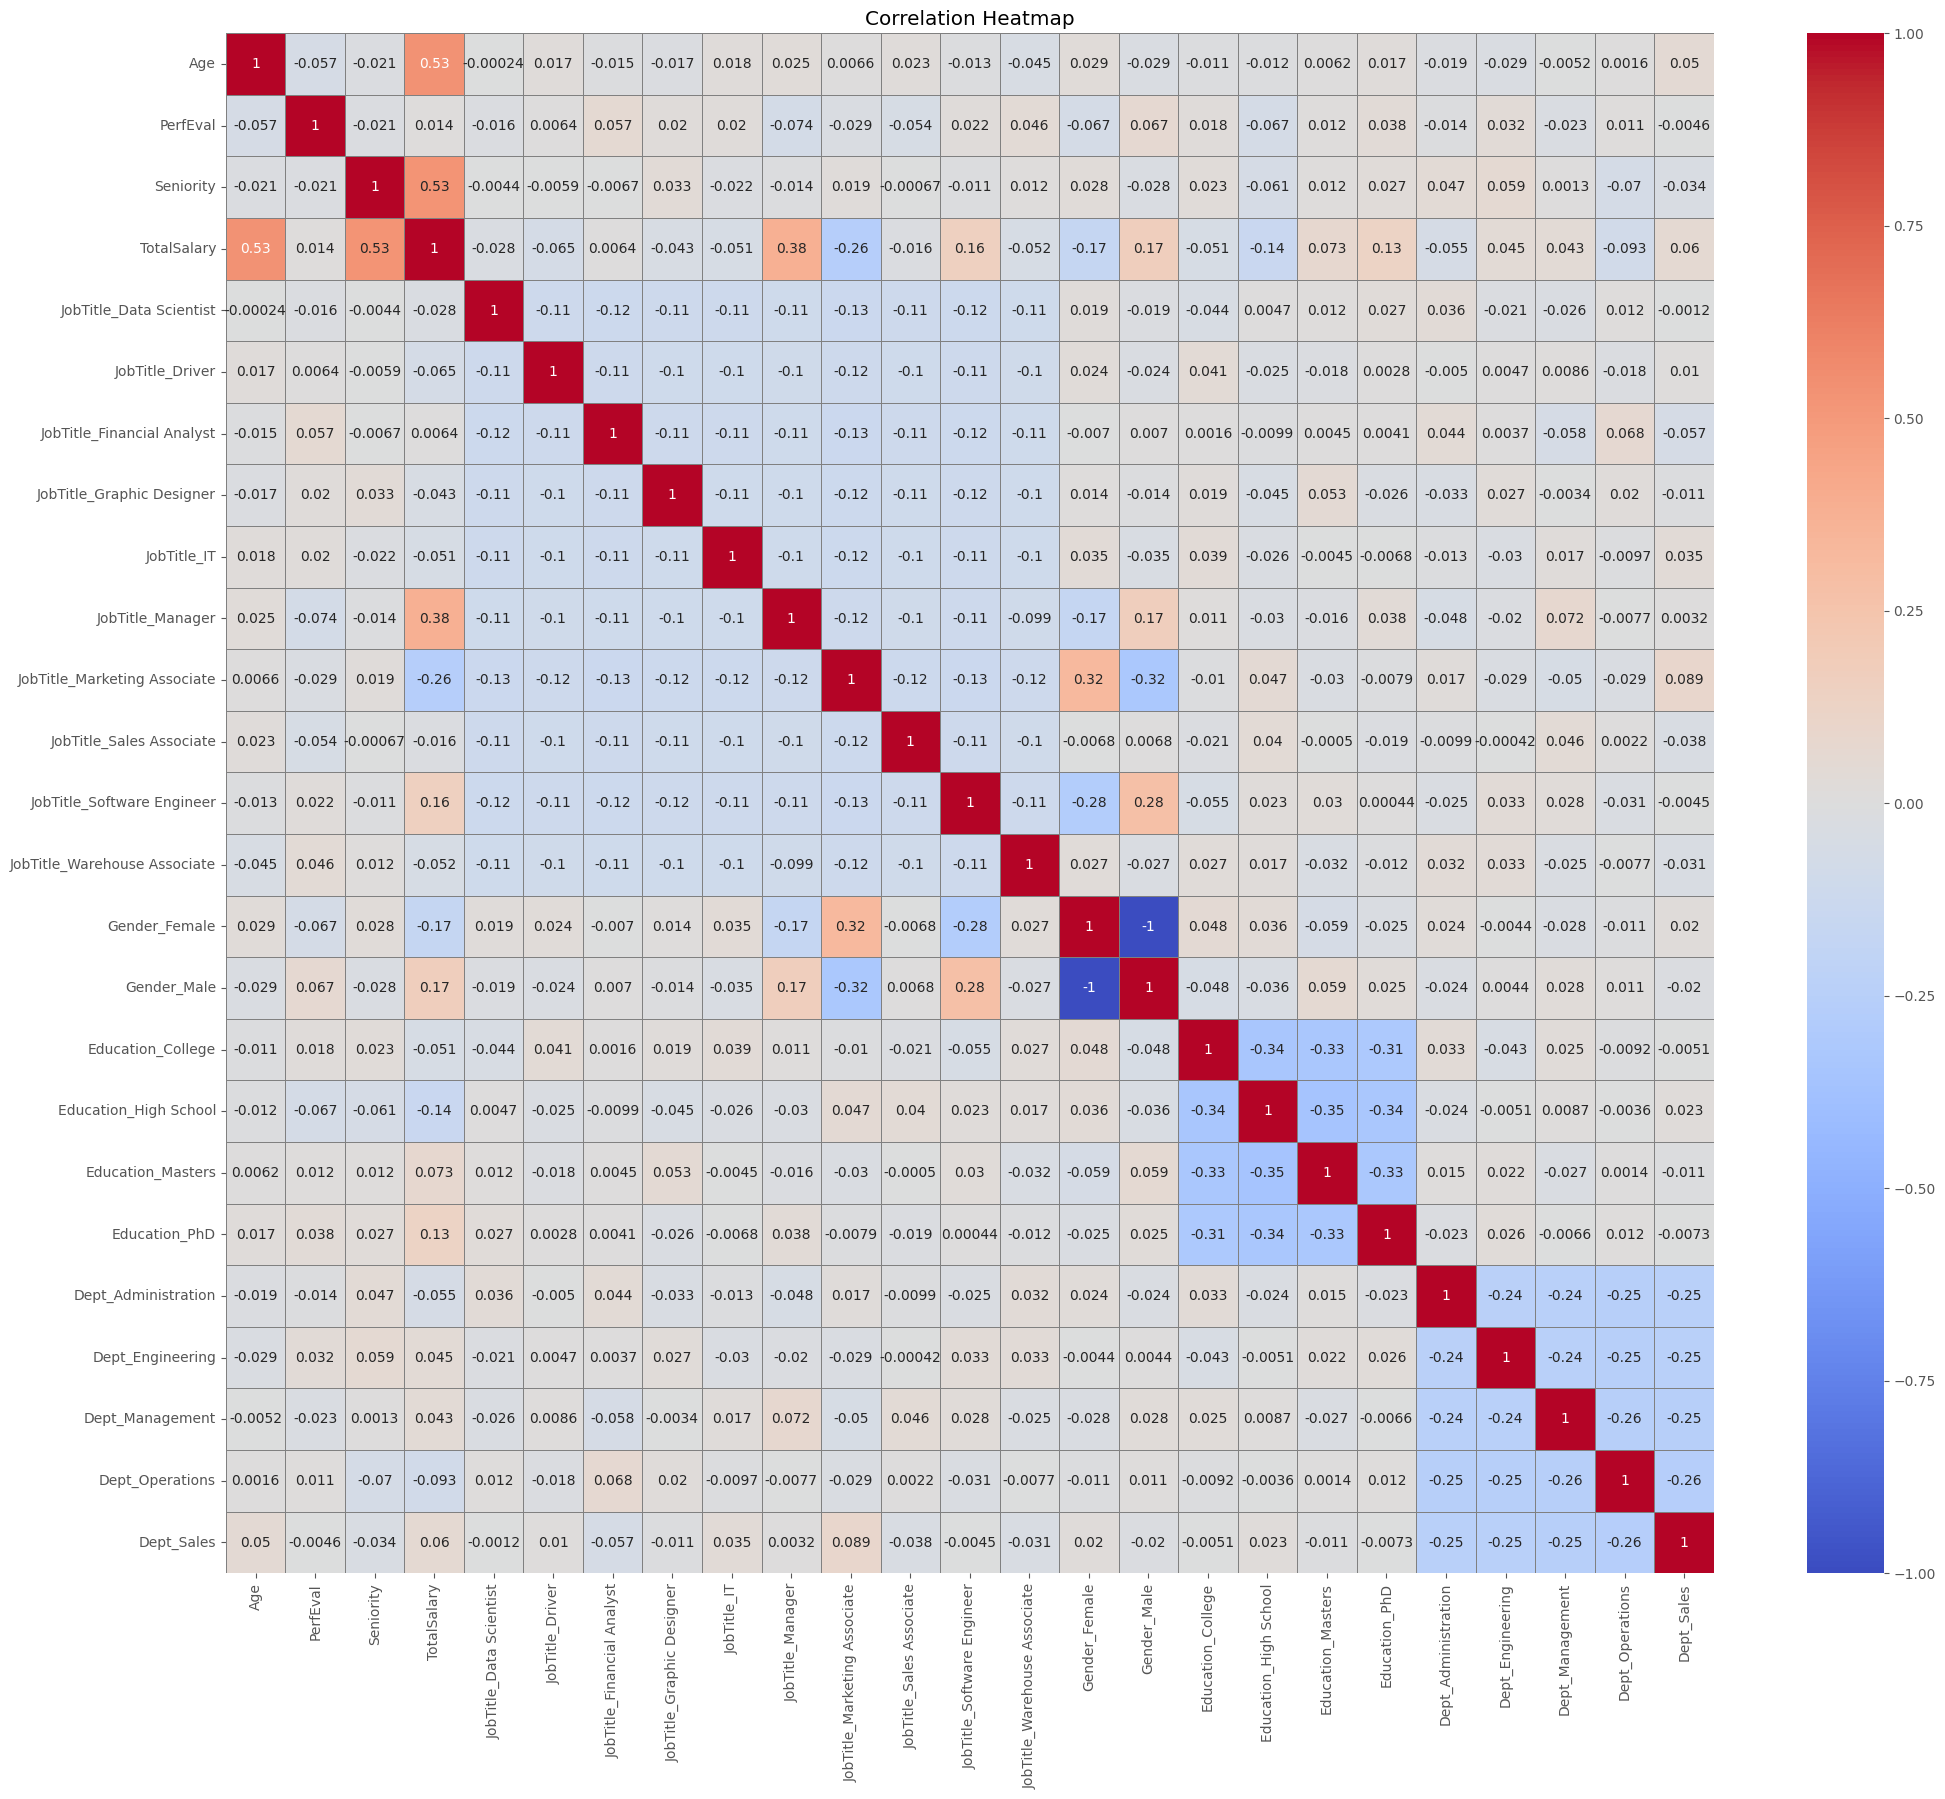

In [ ]:
corr = data_encoded.corr()

# Create the heatmap of the correlation matrix
plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='gray')

plt.title('Correlation Heatmap')
plt.show()